In [1]:
# some plotting instructions
%pylab inline
rcParams['image.aspect'] = 'auto'
style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


# Loading data

In [2]:
from iuvs import io
%autocall 1

Automatic calling is: Smart


In [3]:
import os
files = !ls ~/data/iuvs/level1b/*.gz
for file in files:
    print(os.path.basename(file))

mvn_iuv_l1b_cruisecal2-mode080-fuv_20140521T120028_v00_r00.fits.gz
mvn_iuv_l1b_cruisecal2-mode080-muv_20140521T120028_v00_r00.fits.gz
mvn_iuv_l1b_periapse-orbit00108-mode0001-fuv_20141018T113414_v01_r01.fits.gz
mvn_iuv_l1b_periapse-orbit00108-mode0001-muv_20141018T113414_v01_r01.fits.gz


## loading file with very `lighty` dark
It's the last MUV file that has the very bright dark image.

In [4]:
l1b = io.L1BReader(files[-1])

The DarkIntegration data shows that there are 2 observations of darks, approx 22 minutes apart:

In [5]:
l1b.DarkIntegration

,0,1
TIMESTAMP,4.669037e+08,4.66905e+08
ET,4.669038e+08,4.669051e+08
UTC,2014/291 Oct 18 11:28:44.36433UTC,2014/291 Oct 18 11:50:24.86118UTC
MIRROR_DN,16087,17194
MIRROR_DEG,8.64624,11.68671
FOV_DEG,17.29248,23.37341
LYA_CENTROID,65535,65535


Let's look at the original darks. There are 2 available:

In [6]:
l1b.detector_dark.shape

(2, 7, 256)

In [7]:
def compare_darks(dark1, dark2):
    fig, ax = subplots(nrows=2, figsize=(10,8))
    ax[0].imshow(dark1)
    ax[1].imshow(dark2)

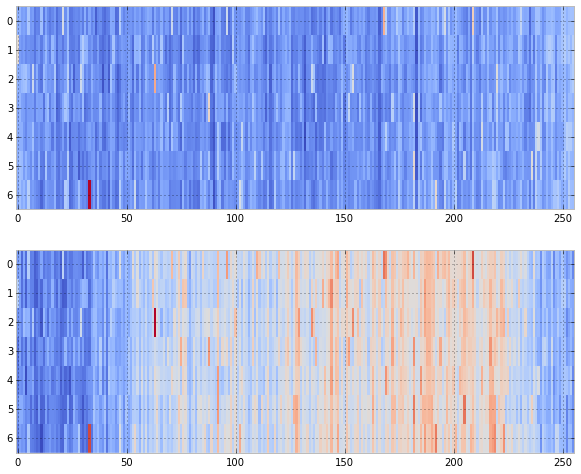

In [8]:
compare_darks(*l1b.detector_dark) # this trick puts the first axis of a cube into a function

As one can see, they are strongly different. The last dark looks similar to a usual light image.

In [9]:
l1b.DarkEngineering

,0,1
SCI_PKT_CKSUM,7,86
SCI_ERR_FLAGS,1,1
XUV,MUV,MUV
LENGTH,1792,1792
IMAGE_NUMBER,0,0
AVERAGE,2037,3844
CHECKSUM,54320,4862
START_TIME,4.669037e+08,4.66905e+08
START_TIME__SUB,15512,48021
CADENCE,4800,4800
